In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
city=pd.read_csv(r'C:\Users\rohan\Downloads\city_data.csv')

In [35]:
city.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [36]:
ride=pd.read_csv(r'C:\Users\rohan\Downloads\ride_data.csv')

In [37]:
ride.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [38]:
city=pd.DataFrame(city)
ride=pd.DataFrame(ride)
df = pd.merge(city, ride, on='city', how='left')
df = df.groupby(['city', "type"])
df = pd.DataFrame(round(df.mean(),2))
df = df.reset_index()
df.head()

,city,type,driver_count,fare,ride_id
0,Amandaburgh,Urban,12.0,24.64,5.359336e+12
1,Barajasview,Urban,26.0,25.33,4.676968e+12
2,Barronchester,Suburban,11.0,36.42,4.460796e+12
3,Bethanyland,Suburban,22.0,32.96,5.842550e+12
4,Bradshawfurt,Rural,7.0,40.06,3.735294e+12


In [40]:
city_count = ride.copy()

city_count = city_count.groupby('city')['ride_id'].count()
city_count = pd.DataFrame(city_count)

city_count = city_count.reset_index()
city_count = city_count.rename(columns={'ride_id':'Total number of rides'})
city_count.head()

,city,Total number of rides
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [41]:
df = pd.merge(df,city_count, on='city')

df = df.loc[:,['city', 'type', 'Total number of rides', 'driver_count', 'fare',]]

df = pd.DataFrame(df)
df.rename(columns={'city':'City',
                   'type':'Types',
                   'fare':'Average fare',
                   'driver_count':'Total drivers'
                  })

,City,Types,Total number of rides,Total drivers,Average fare
0,Amandaburgh,Urban,18,12.0,24.64
1,Barajasview,Urban,22,26.0,25.33
2,Barronchester,Suburban,16,11.0,36.42
3,Bethanyland,Suburban,18,22.0,32.96
4,Bradshawfurt,Rural,10,7.0,40.06
...,...,...,...,...,...
115,West Robert,Urban,31,39.0,25.12
116,West Samuelburgh,Urban,25,73.0,21.77
117,Williamsonville,Suburban,14,2.0,31.87
118,Williamsstad,Urban,23,59.0,24.36


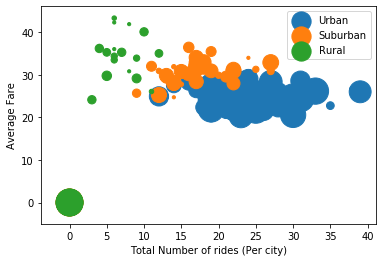

In [63]:
u = df.type.str.count(r'Urban')
s = df.type.str.count(r'Suburban')
r = df.type.str.count(r'Rural')
x = (df['Total number of rides'] * u) 
y = (df['fare'] * u)
plt.scatter(x, y, s = df['driver_count']*10, label="Urban")
x = (df['Total number of rides'] * s)
y = (df['fare'] * s)
plt.scatter(x, y, s = df['driver_count']*10, label='Suburban')
x = (df['Total number of rides'] * r)
y = (df['fare'] * r)
plt.scatter(x, y, s = df['driver_count']*10, label='Rural')
plt.ylabel('Average Fare')
plt.xlabel('Total Number of rides (Per city)')
plt.ylabel('Average Fare')
plt.xlabel('Total Number of rides (Per city)')
plt.legend()
plt.show()

In [65]:
df1 = pd.merge(city, ride, on='city')
df1 = df1.groupby('type')['fare'].sum()
df1 = pd.DataFrame(df1)
df1['% of total fare'] = df1['fare']/df1['fare'].sum()*100
df1 = df1.reset_index()
df1

,type,fare,% of total fare
0,Rural,4327.93,6.811493
1,Suburban,19356.33,30.463872
2,Urban,39854.38,62.724635


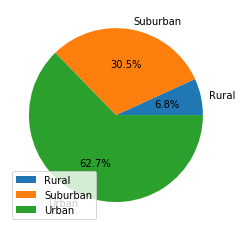

In [71]:
types = df1['type']
total_fare = df1['% of total fare']
plt.pie(total_fare,labels=types,autopct="%1.1f%%")
plt.legend()
plt.show()

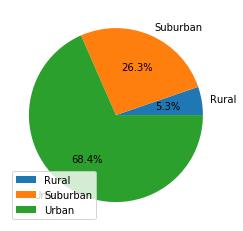

In [74]:
df2 = df.groupby('type')['Total number of rides'].sum()
df2 = pd.DataFrame(df2)
df2 = df2.reset_index()
df2['% of total rides'] = df2['Total number of rides']/df2['Total number of rides'].sum()* 100
types = df2['type']
total_rides = df2['% of total rides']
plt.pie(total_rides,labels=types,autopct="%1.1f%%")
plt.legend()
plt.show()

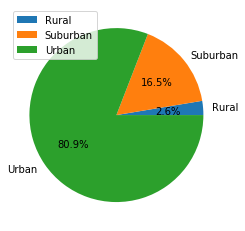

In [77]:
df3 = df.groupby('type')['driver_count'].sum()
df3 = pd.DataFrame(df3)
df3 = df3.reset_index()
df3['% of total drivers'] = df3['driver_count']/df3['driver_count'].sum()* 100
types = df3['type']
total_drivers = df3['% of total drivers']
plt.pie(total_drivers,labels=types,autopct="%1.1f%%")
plt.legend()
plt.show()